# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('Train R^2', linreg.score(predictor_train, response_train))
    print('Test R^2', linreg.score(predictor_test, response_test))

    response_train_pred = linreg.predict(predictor_train)
    response_test_pred = linreg.predict(predictor_test)
    
    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].scatter(response_train, response_train_pred)
    axes[0].plot(response_train, response_train, 'w-', linewidth = 1)
    axes[0].set_xlabel(predictor.columns[0])
    axes[0].set_ylabel(response.columns[0])
    axes[1].scatter(response_test, response_test_pred)
    axes[1].plot(response_train, response_train, 'w-', linewidth = 1)
    axes[1].set_xlabel(predictor.columns[0])
    axes[1].set_ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateConfusionMatrix(response, response_pred, title):
    print(title)
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def generatePredictVsTruePlot(response, response_pred, title):
    plt.figure(figsize=(8, 4))
    plt.title(title)
    plt.scatter(response, response_pred)
    plt.plot(response, response, 'w-', linewidth = 1)
    plt.xlabel("True values of the Response Variable (Train)")
    plt.ylabel("Predicted values of the Response Variable (Train)")
    plt.show()
    
def generateRandomForestClassifier(data, predictor, response, n_estimators, depth):
    print(f'{predictor} vs. {response} with depth {depth}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Classifier object
    random_forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = depth)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    # Print the Train and Test Classification Accuracy
    print("Train Classification Accuracy \t:", random_forest.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", random_forest.score(predictor_test, response_test))

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateRandomForestRegressor(data, predictor, response, n_estimators, random_state):
    print(f'{predictor} vs. {response}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Regressor object
    random_forest = RandomForestRegressor(n_estimators = n_estimators, random_state = random_state)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)
    
    # Print the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_train, response_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_train, response_train_pred))
    print()

    # Print the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_test, response_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_test, response_test_pred))
    print()

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}
   

# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.42624188]
Coefficients 	: a =  [[0.21210173]]
Train R^2 0.004736237058992621
Test R^2 0.0017441131213786765


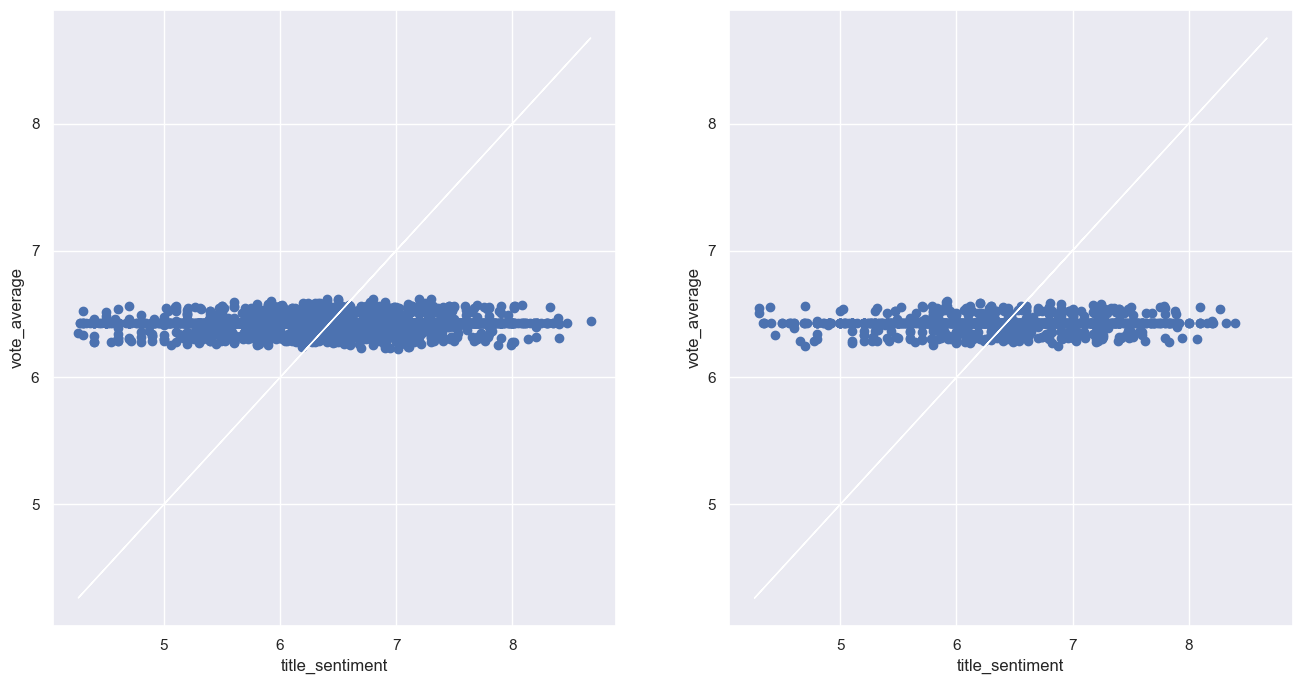

Intercept 	: b =  [6.43266424]
Coefficients 	: a =  [[0.12608195]]
Train R^2 0.010918912184492036
Test R^2 0.00664201661256858


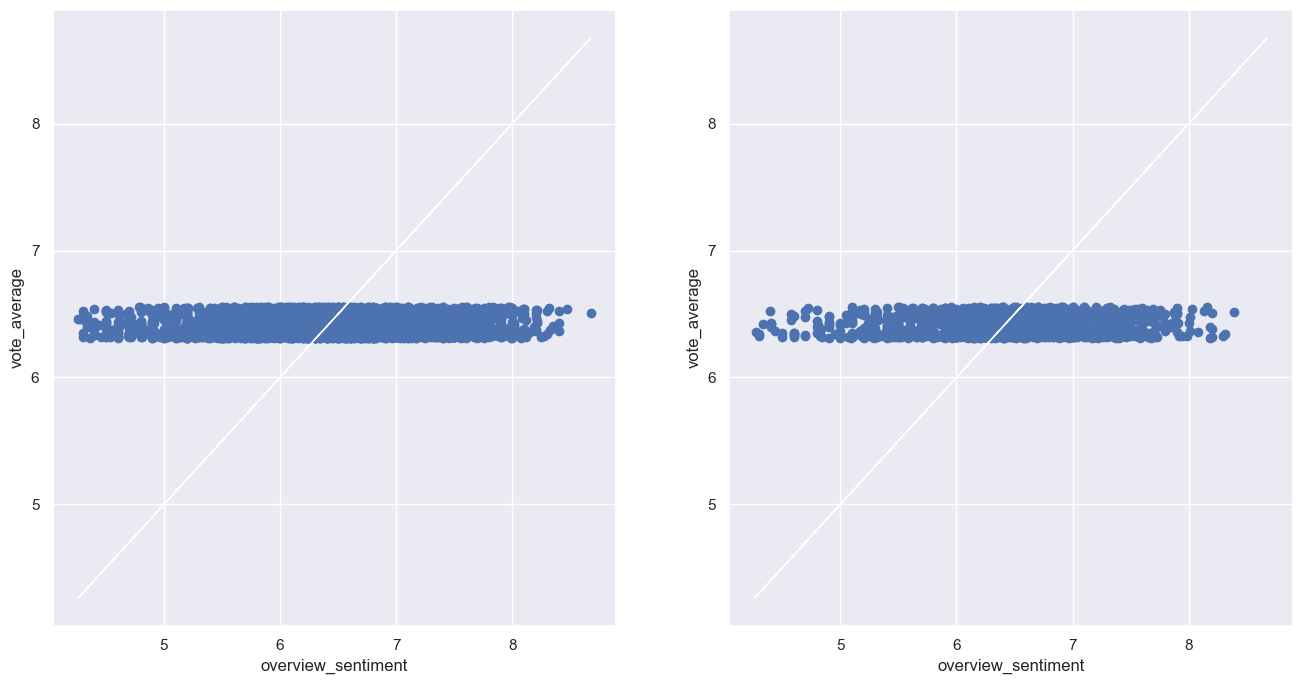

Intercept 	: b =  [6.34470771]
Coefficients 	: a =  [[0.00522649]]
Train R^2 0.004389677844629514
Test R^2 0.006515182122910246


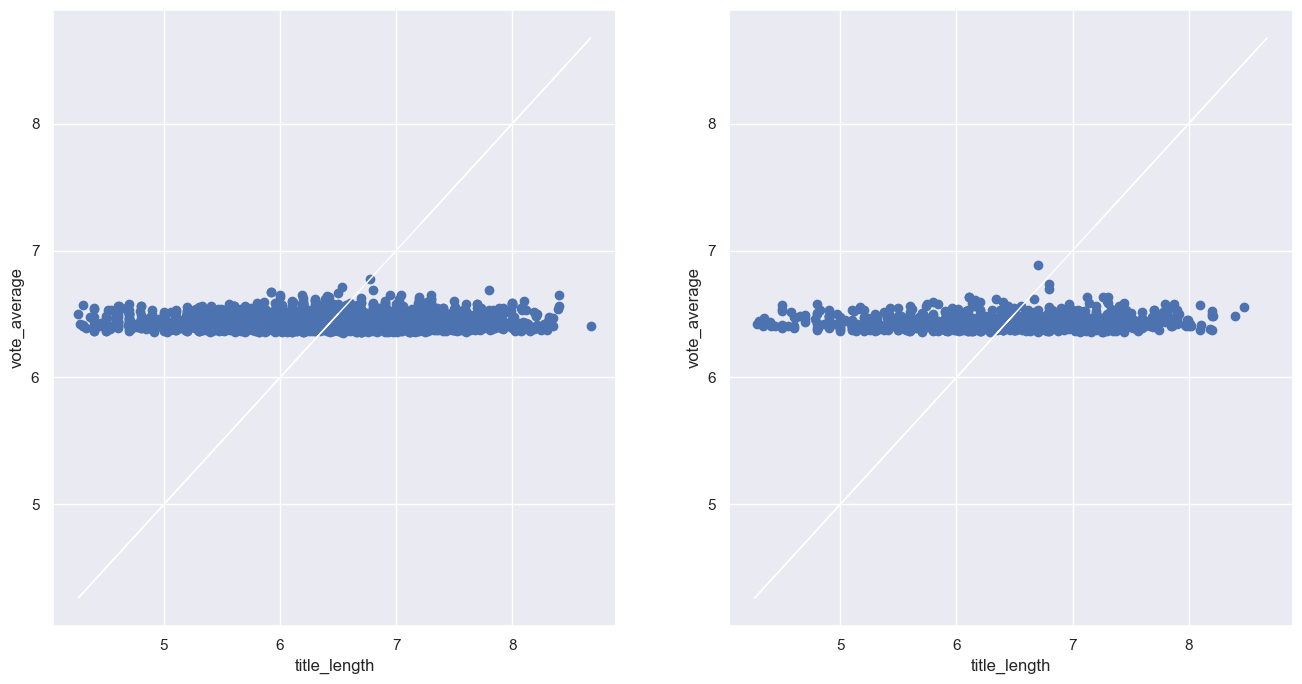

Intercept 	: b =  [6.33369908]
Coefficients 	: a =  [[0.0265974]]
Train R^2 0.003824199441563425
Test R^2 0.003409075945487783


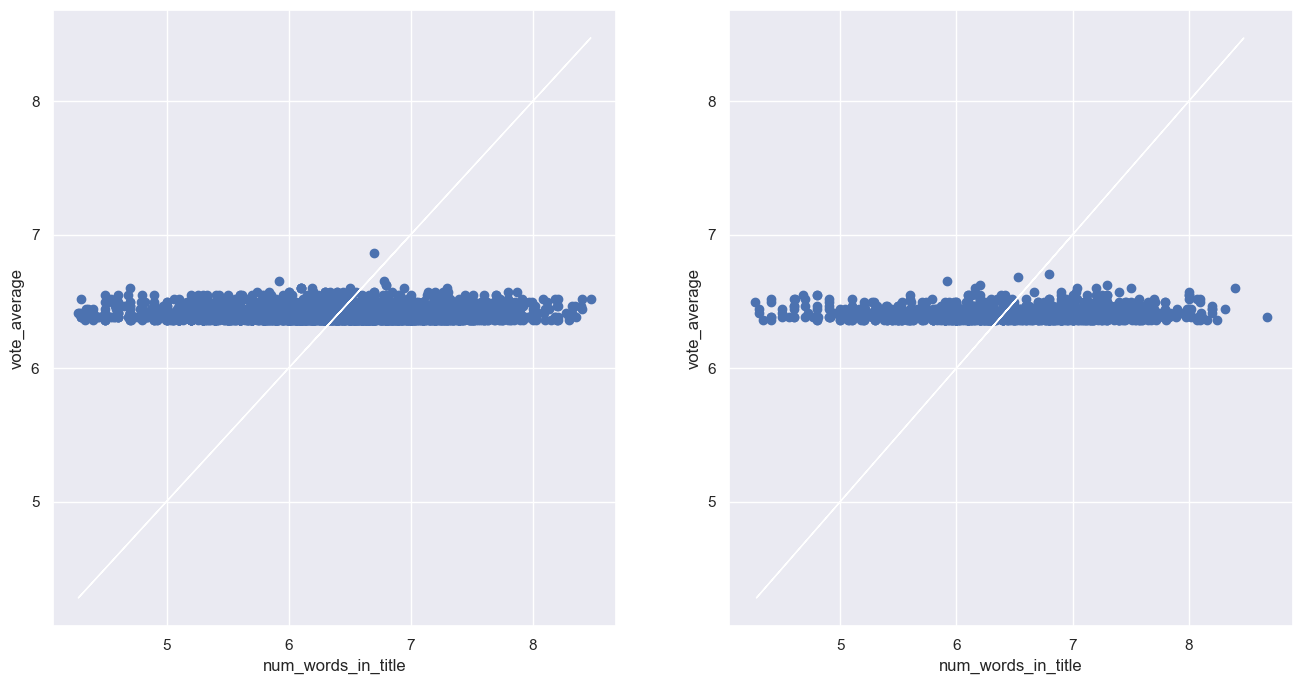

Intercept 	: b =  [6.4304088]
Coefficients 	: a =  [[-0.0015623]]
Train R^2 1.4220428808497942e-05
Test R^2 0.00019287398805767353


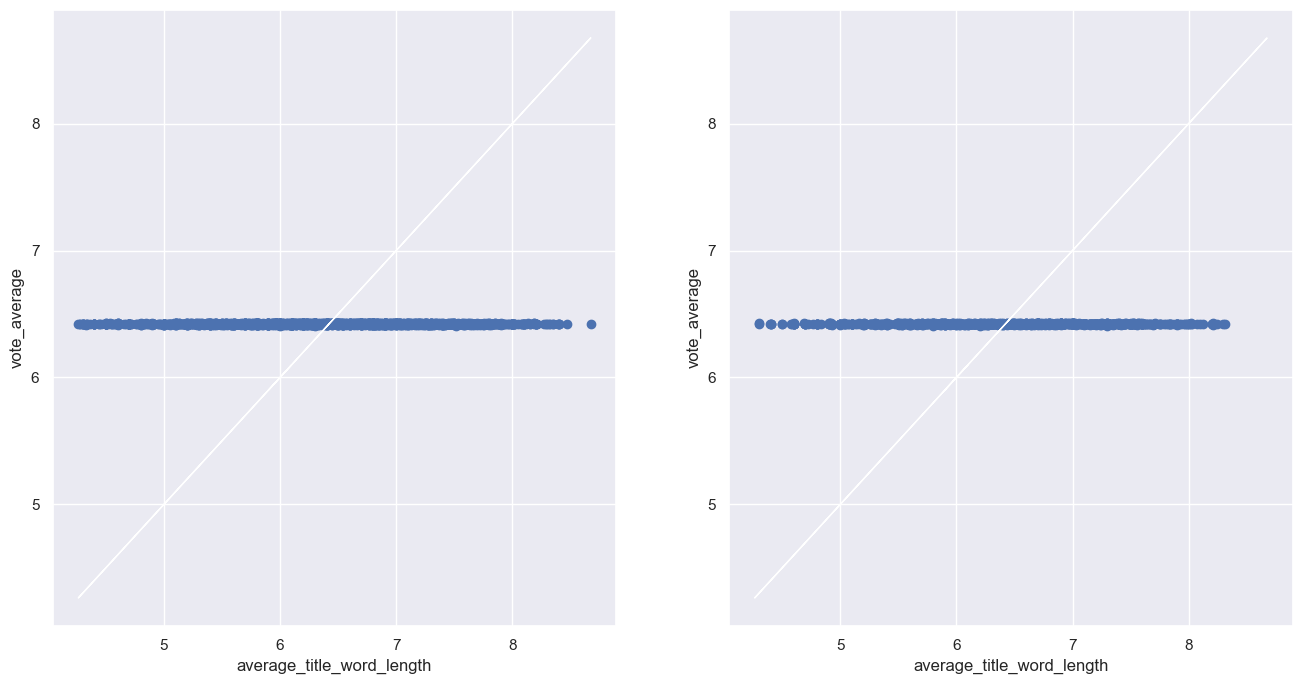

Intercept 	: b =  [6.41225121]
Coefficients 	: a =  [[0.09164361]]
Train R^2 0.0025205783316547548
Test R^2 -0.00043179488296196666


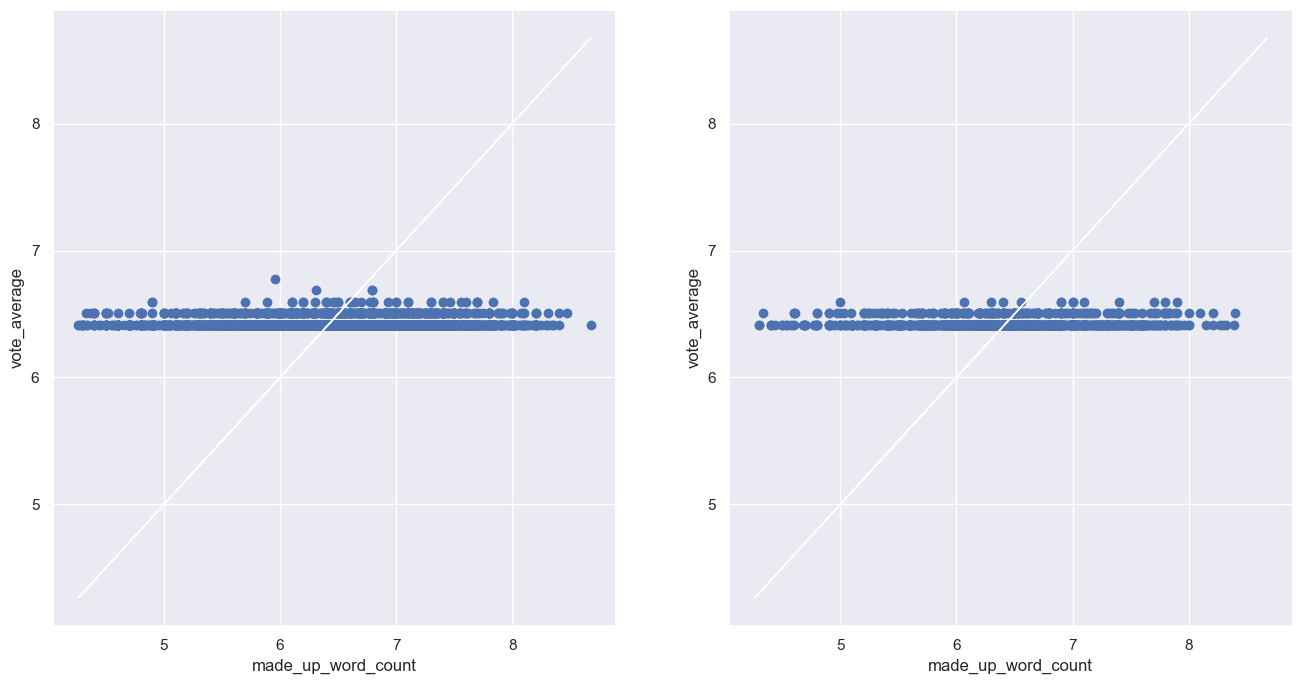

In [148]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Multi-Variate Predictor vs. Vote Average

Intercept 	: b =  [6.38465022]
Coefficients 	: a =  [[ 0.12917216  0.11069917  0.00306421  0.0054506  -0.00387581  0.05978638]]
Train R^2 0.017282505009347915
Test R^2 0.016255880608294082


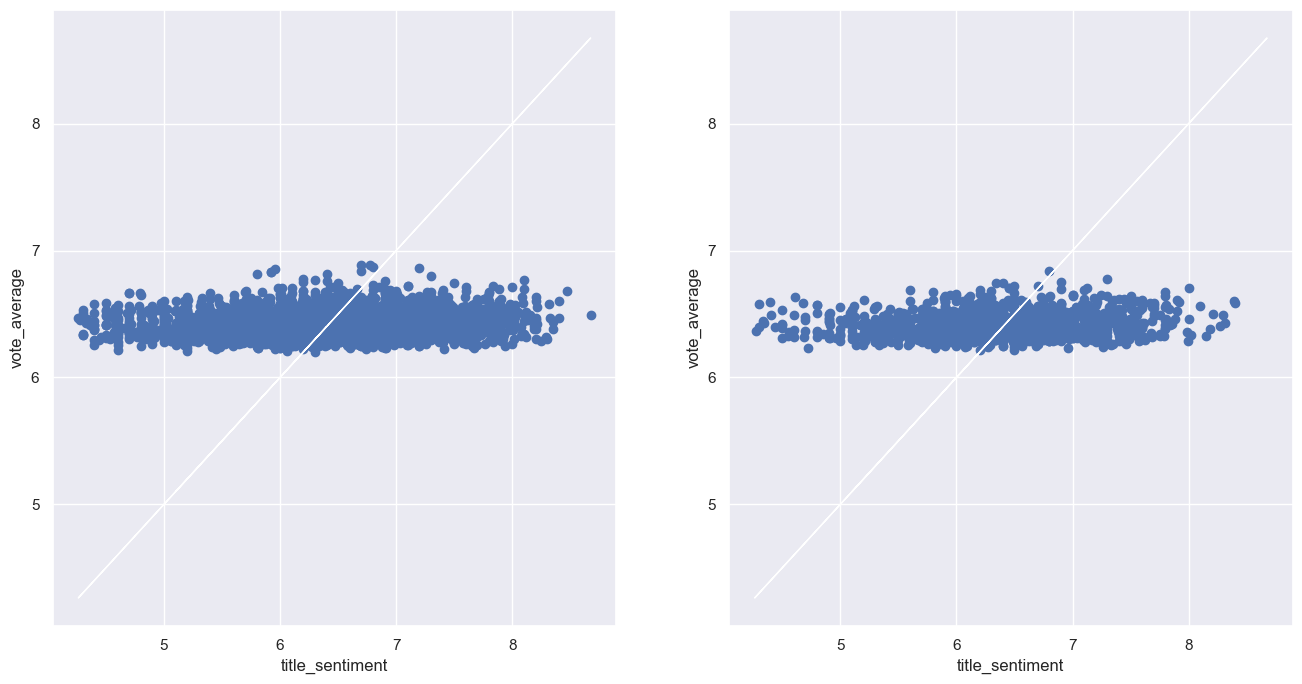

In [149]:
multi_variate_linreg = performLinearRegression(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [20.98851551]
Coefficients 	: a =  [[-0.07598098]]
Train R^2 1.0516295683826726e-05
Test R^2 0.00013761423711744492


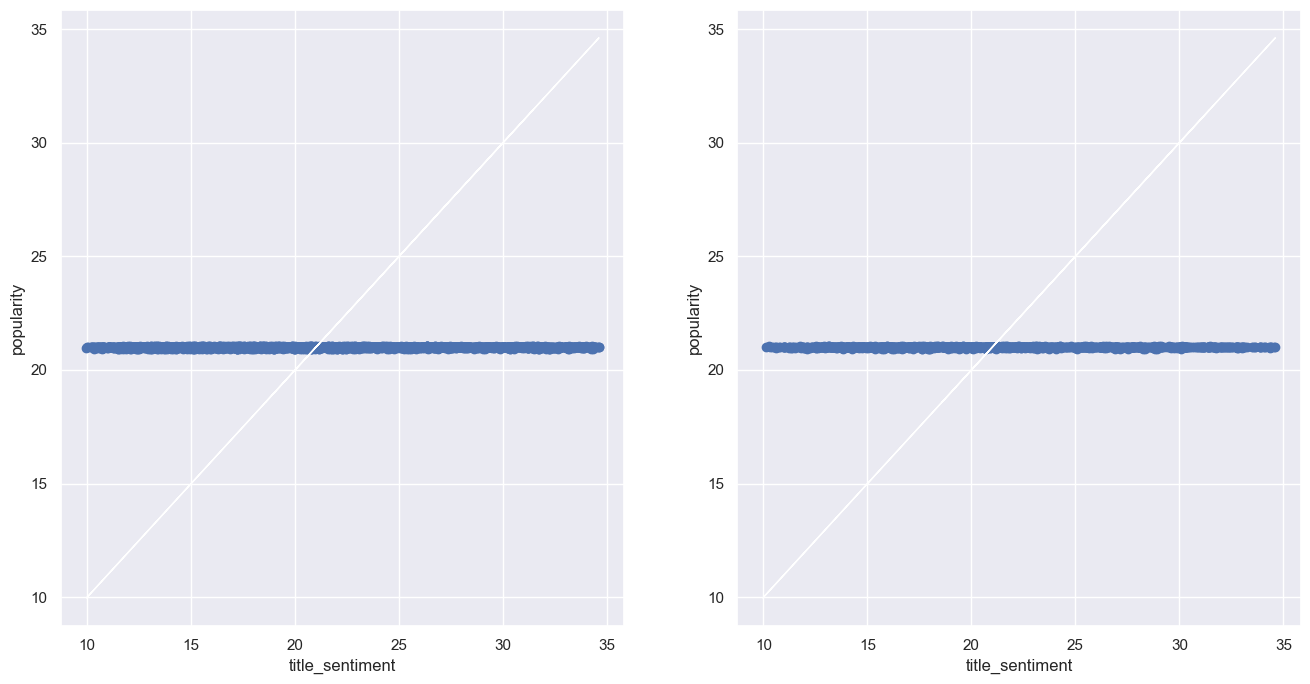

Intercept 	: b =  [21.03214198]
Coefficients 	: a =  [[-0.152889]]
Train R^2 0.00027978061754241335
Test R^2 -0.0007588747175923949


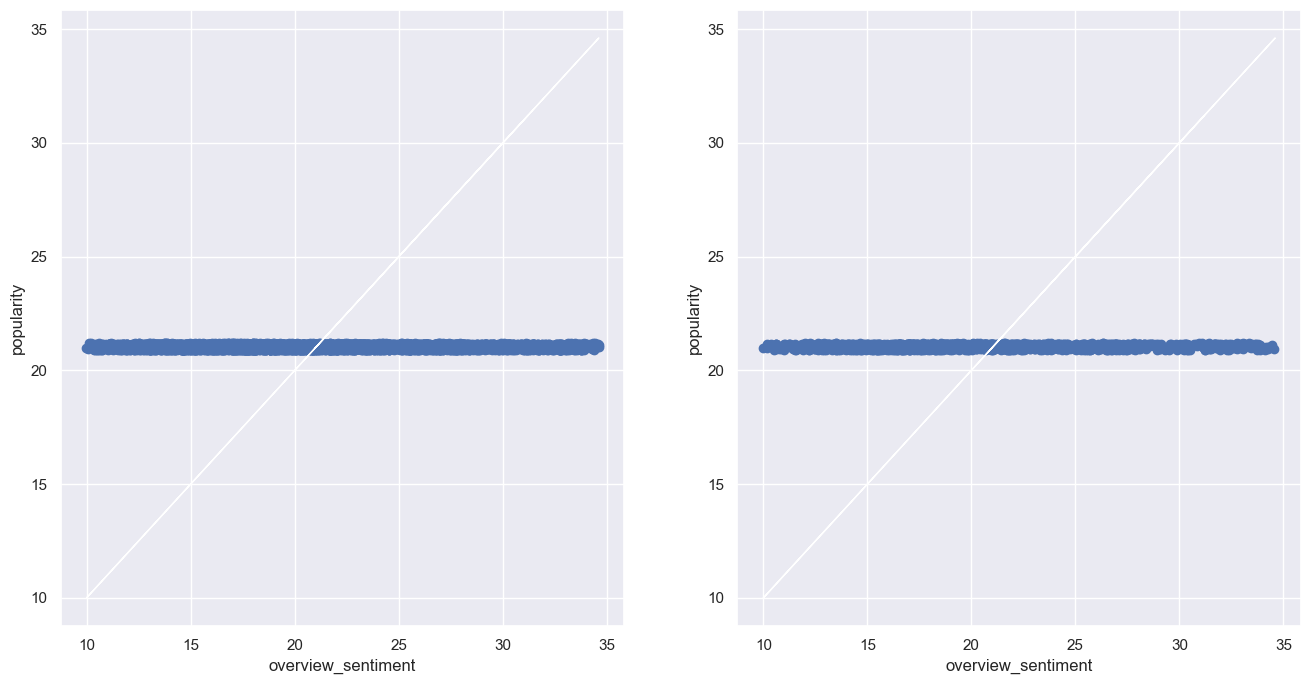

Intercept 	: b =  [21.11139158]
Coefficients 	: a =  [[-0.00809768]]
Train R^2 0.00018133443062218202
Test R^2 -0.00028332072235248695


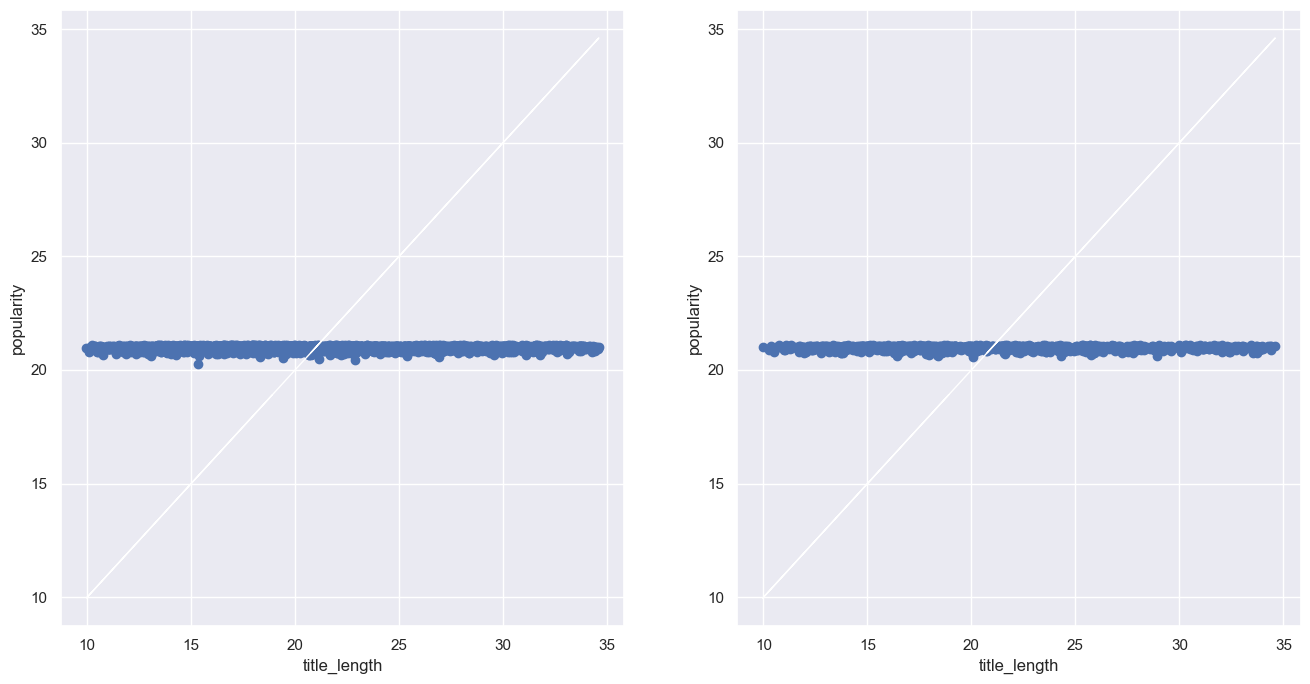

Intercept 	: b =  [21.00726436]
Coefficients 	: a =  [[-0.02803456]]
Train R^2 7.428144382237711e-05
Test R^2 -0.0015158873126057681


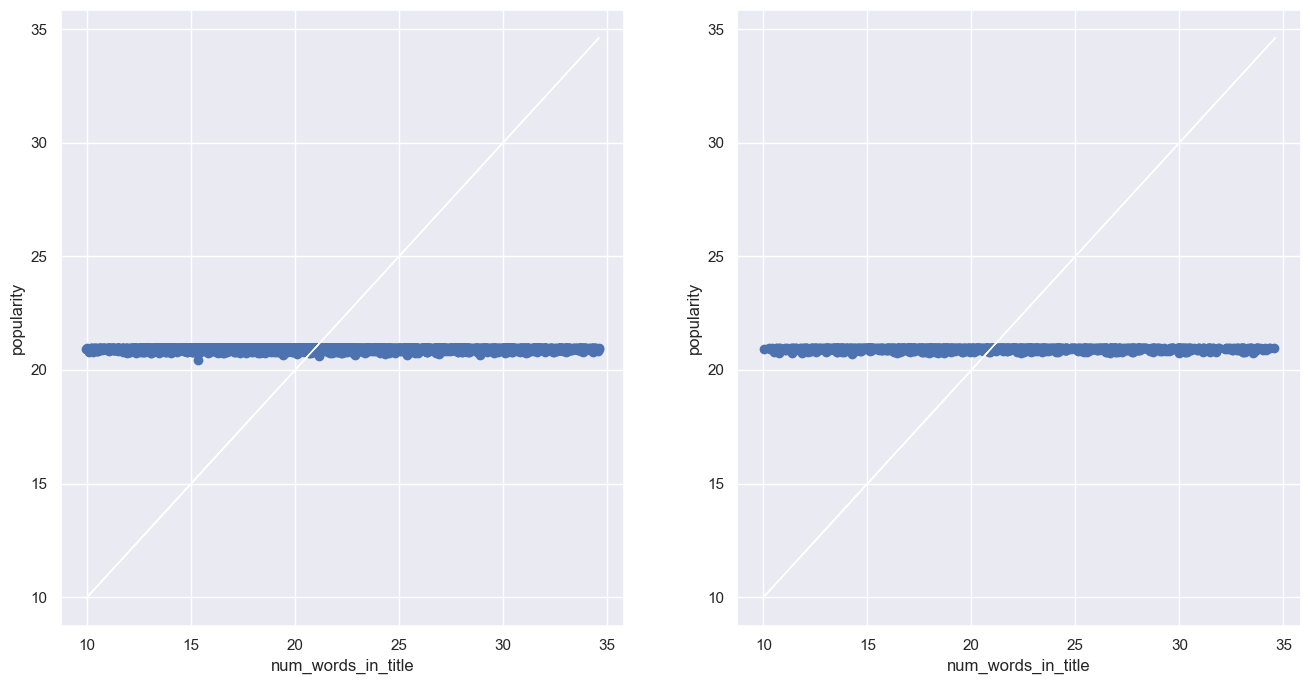

Intercept 	: b =  [20.71546394]
Coefficients 	: a =  [[0.05474158]]
Train R^2 0.0002885664082784567
Test R^2 0.00011538945467015616


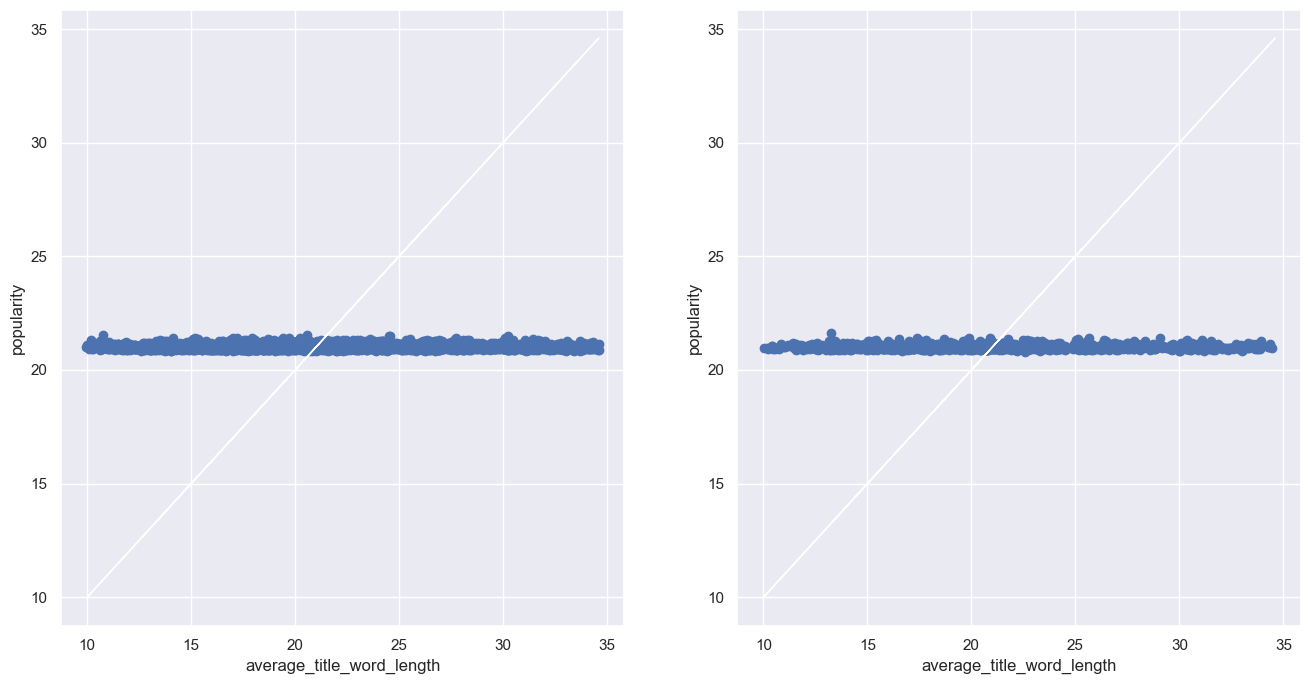

Intercept 	: b =  [20.93032132]
Coefficients 	: a =  [[0.26233908]]
Train R^2 0.0003524126024682106
Test R^2 -0.0006346173858402526


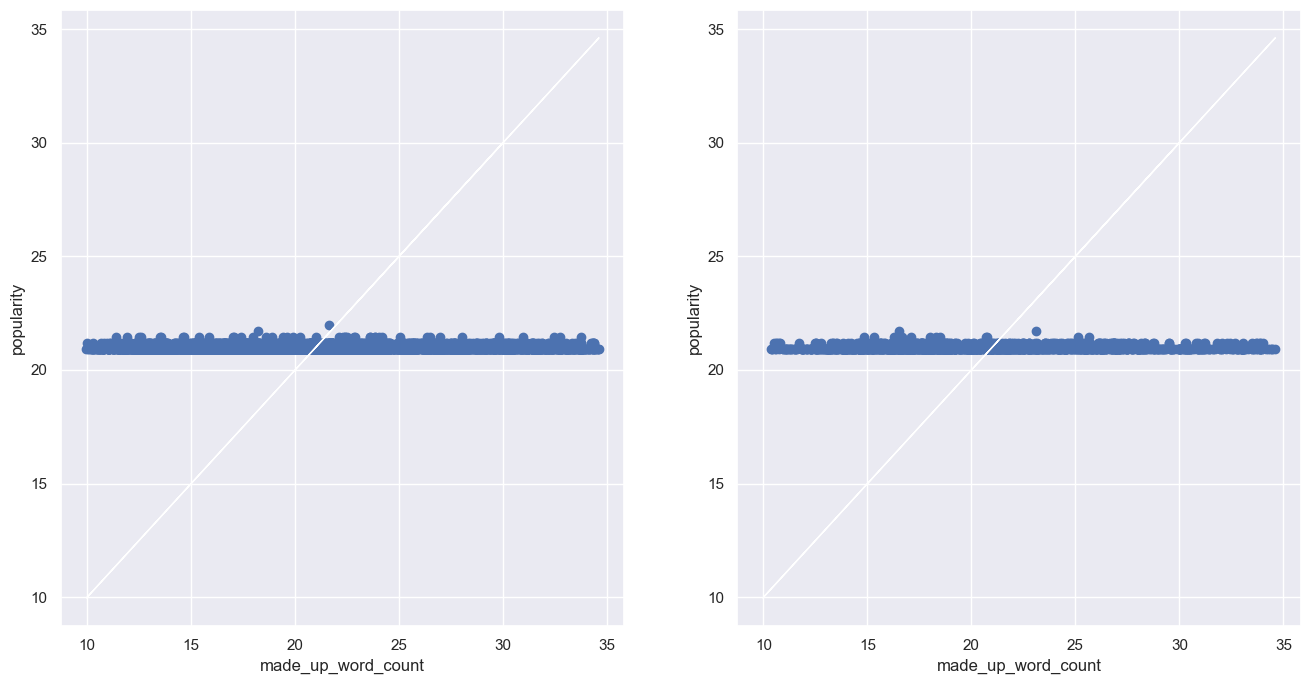

In [154]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

## Multi-Variate Predictor vs. Popularity

Intercept 	: b =  [19.7156275]
Coefficients 	: a =  [[-0.29066392 -0.18107682 -0.08181279  0.46952201  0.22281503  0.20766055]]
Train R^2 0.002488530909175446
Test R^2 -0.0034100080111034714


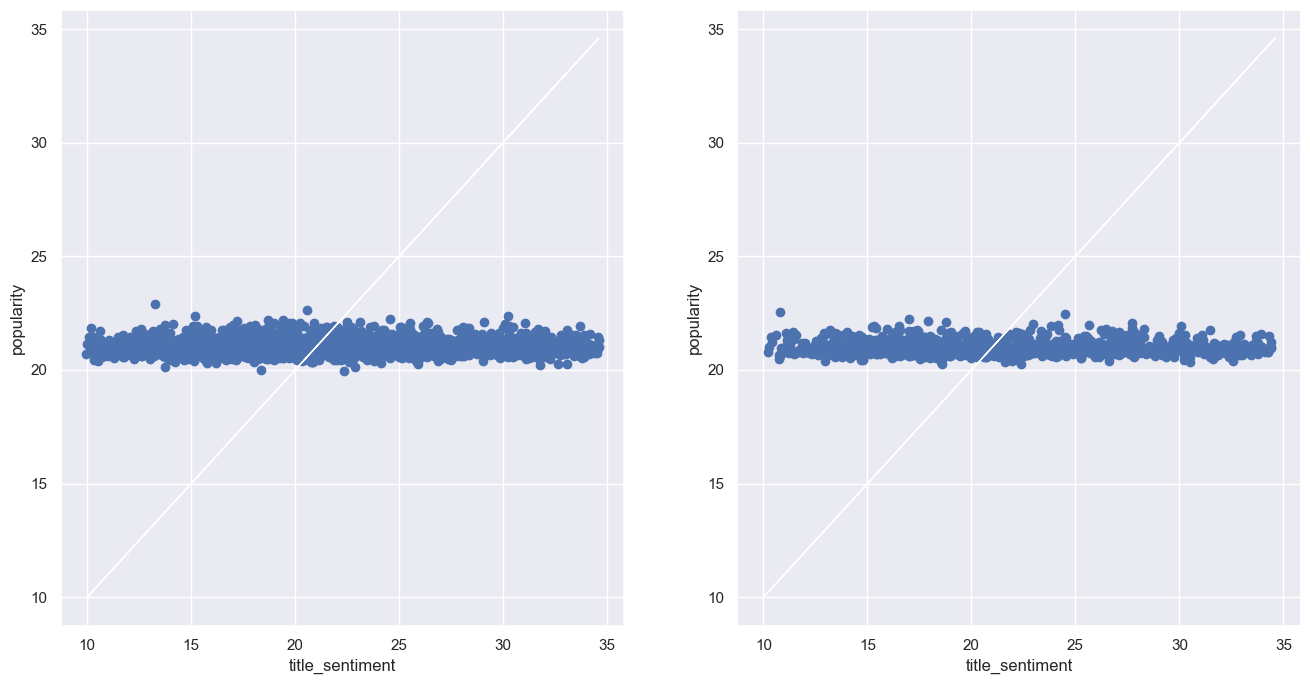

In [160]:
multi_variate_linreg = performLinearRegression(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], 'popularity')

# Random Forest Regressor

## Predictor vs. Vote Average

title_sentiment vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03809398212532489
Mean Squared Error (MSE) 	: 0.5452921676692187

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.008597445095622103
Mean Squared Error (MSE) 	: 0.5743490108533874



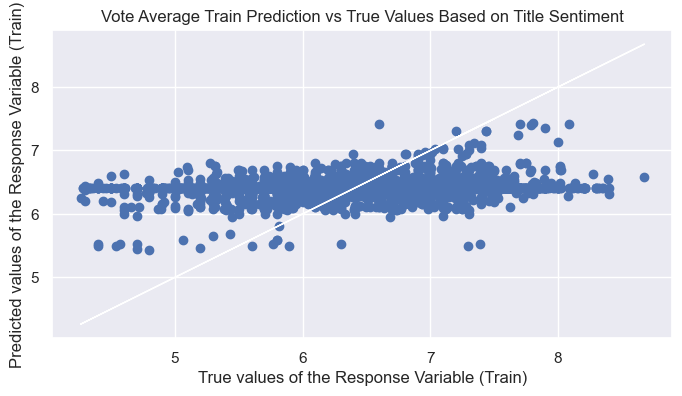

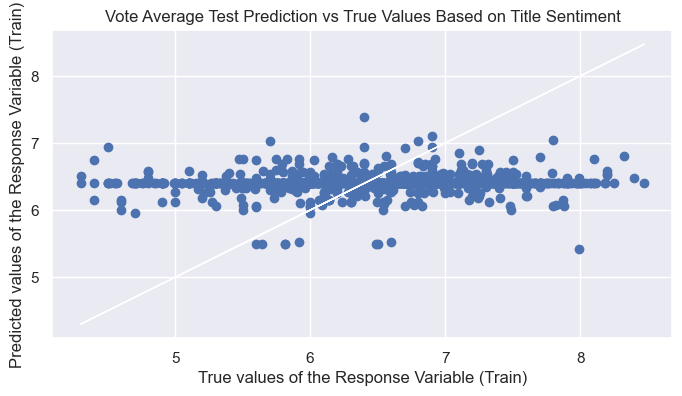

overview_sentiment vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.21610931036274972
Mean Squared Error (MSE) 	: 0.4482716522373109

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.10942931819747437
Mean Squared Error (MSE) 	: 0.6163662545083373



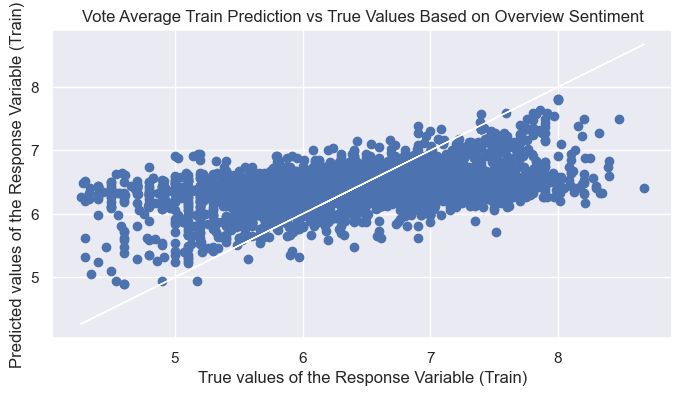

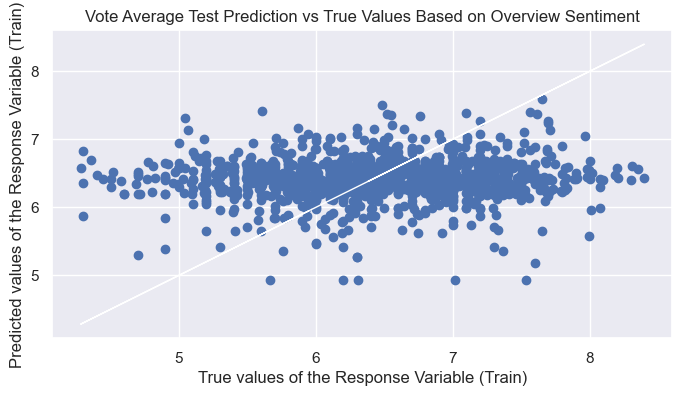

title_length vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01945427165763214
Mean Squared Error (MSE) 	: 0.5534113855596471

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0047045974183679284
Mean Squared Error (MSE) 	: 0.5752334517557518



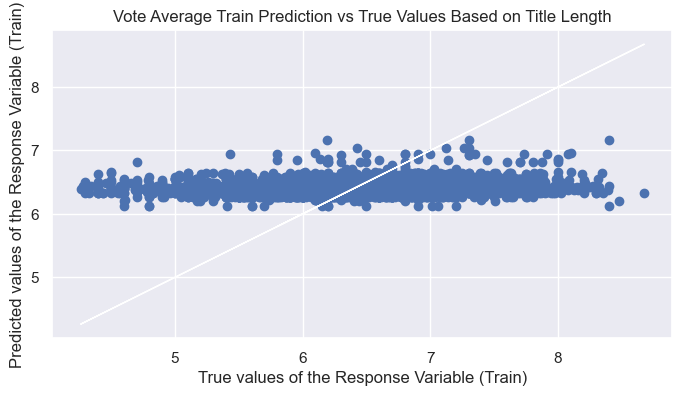

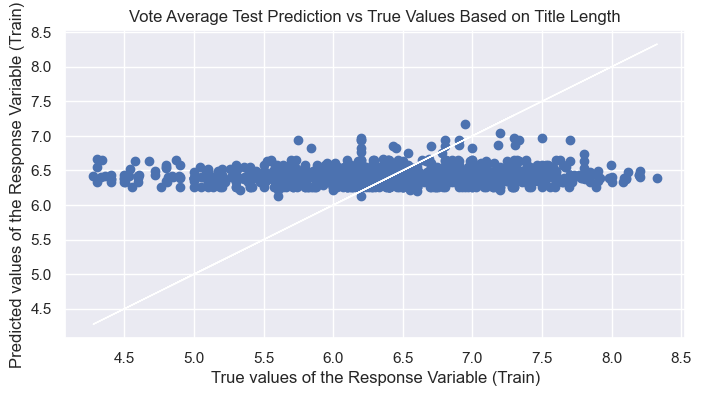

num_words_in_title vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0074878882861786344
Mean Squared Error (MSE) 	: 0.5625249522506565

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.008103799902959508
Mean Squared Error (MSE) 	: 0.564891452427729



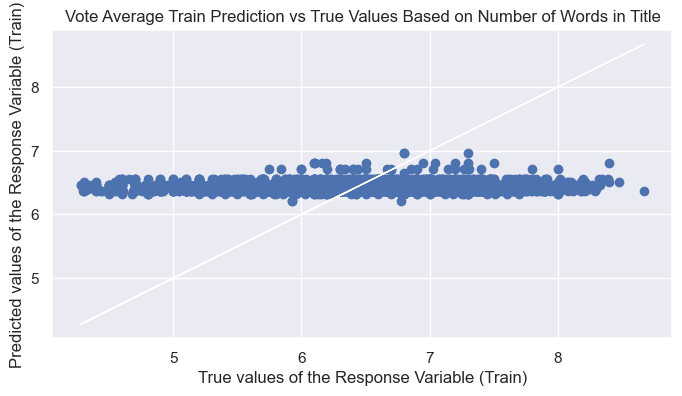

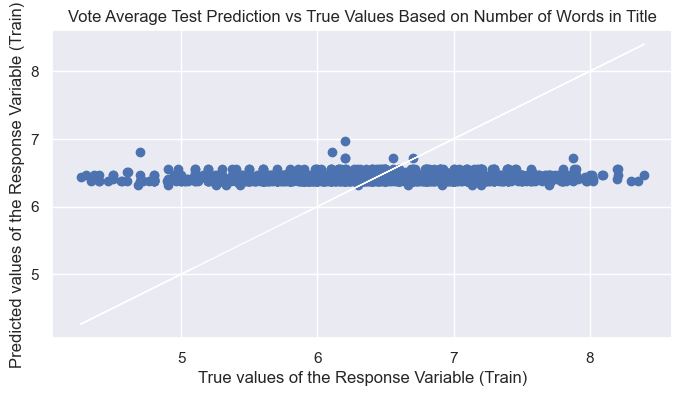

average_title_word_length vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.035351160944120386
Mean Squared Error (MSE) 	: 0.5384736172245532

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.013089898733090743
Mean Squared Error (MSE) 	: 0.604232561995697



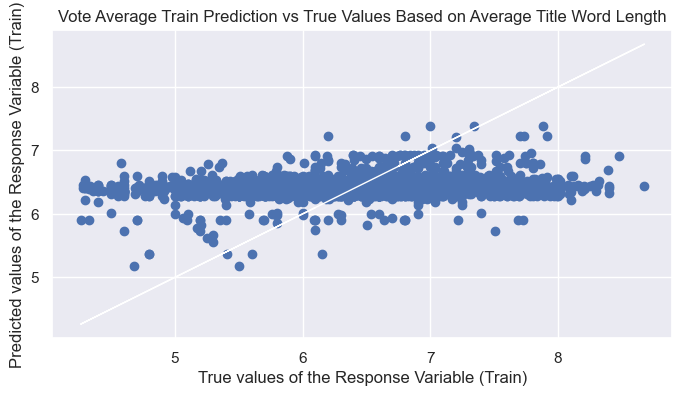

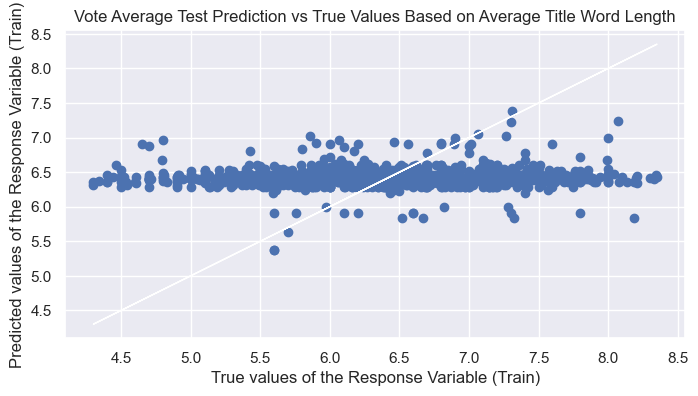

made_up_word_count vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.003654257891389512
Mean Squared Error (MSE) 	: 0.561147021163907

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0019434048099815637
Mean Squared Error (MSE) 	: 0.5803037864049111



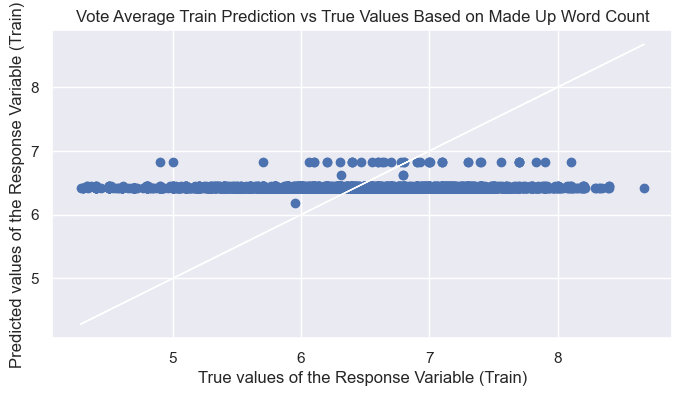

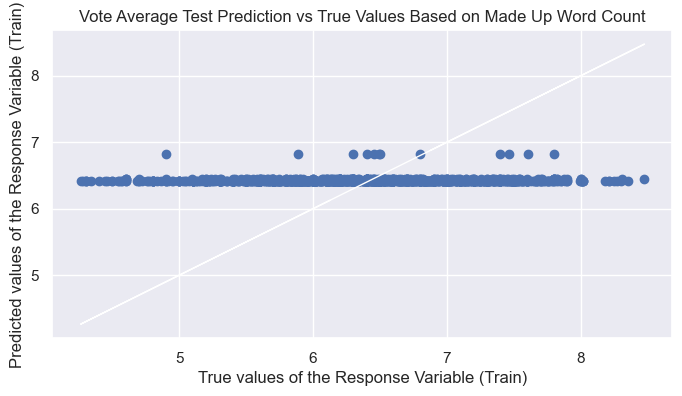

In [170]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "title_sentiment", "vote_average", 200, 0)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Title Sentiment")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Title Sentiment")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "overview_sentiment", "vote_average", 200, 0)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Overview Sentiment")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Overview Sentiment")

title_length_random_forest = generateRandomForestRegressor(data, "title_length", "vote_average", 200, 0)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Title Length")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Title Length")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "num_words_in_title", "vote_average", 200, 0)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Number of Words in Title")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Number of Words in Title")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "average_title_word_length", "vote_average", 200, 0)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Average Title Word Length")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Average Title Word Length")

made_up_word_count_random_forest = generateRandomForestRegressor(data, "made_up_word_count", "vote_average", 200, 0)
generatePredictVsTruePlot(made_up_word_count_random_forest['response_train'], made_up_word_count_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Made Up Word Count")
generatePredictVsTruePlot(made_up_word_count_random_forest['response_test'], made_up_word_count_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Made Up Word Count")

## Multi-Variate Predictor vs. Vote Average

['title_sentiment', 'overview_sentiment', 'title_length', 'num_words_in_title', 'average_title_word_length', 'made_up_word_count'] vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.792134710323261
Mean Squared Error (MSE) 	: 0.11720078789713397

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.10627324470978339
Mean Squared Error (MSE) 	: 0.6411247588209673



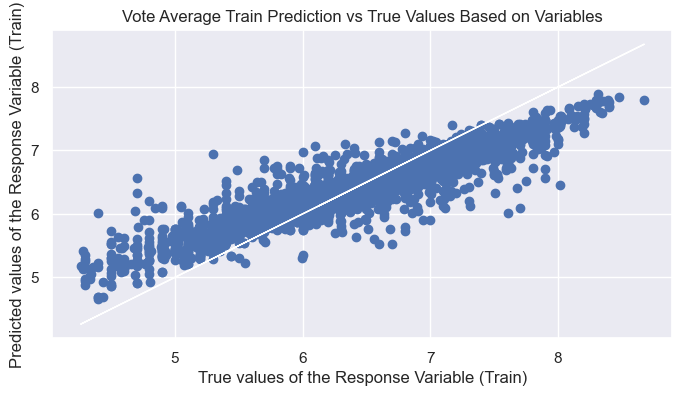

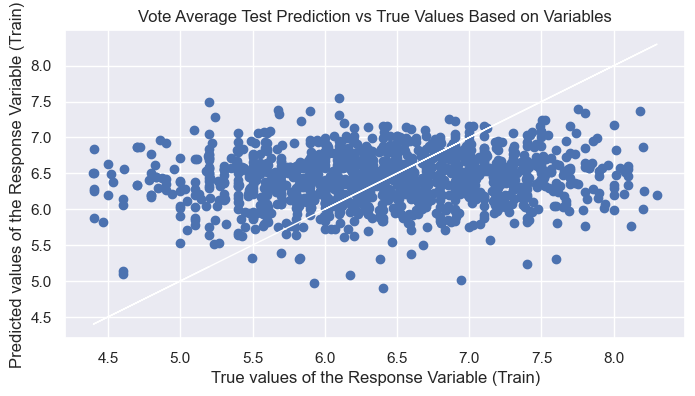

In [166]:
multi_variate_random_forest = generateRandomForestRegressor(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], "vote_average", 200, 0)
generatePredictVsTruePlot(multi_variate_random_forest['response_train'], multi_variate_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Variables")
generatePredictVsTruePlot(multi_variate_random_forest['response_test'], multi_variate_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Variables")

## Predictor vs. Popularity

title_sentiment vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03355294597186964
Mean Squared Error (MSE) 	: 31.816474612555954

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.02824940772015938
Mean Squared Error (MSE) 	: 35.775751494202275



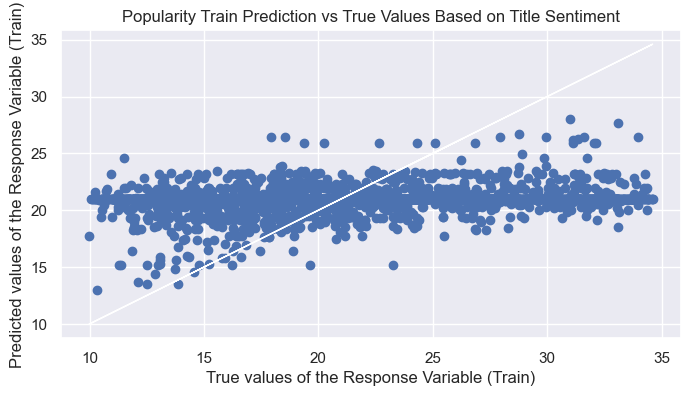

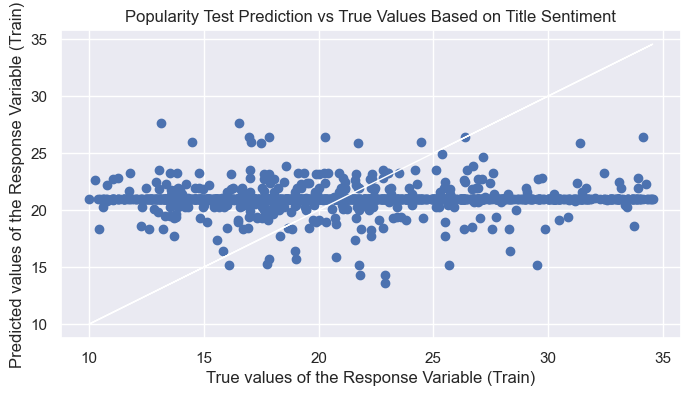

overview_sentiment vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.21505933951085165
Mean Squared Error (MSE) 	: 26.289388719485984

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.15229194829958237
Mean Squared Error (MSE) 	: 38.180353896244576



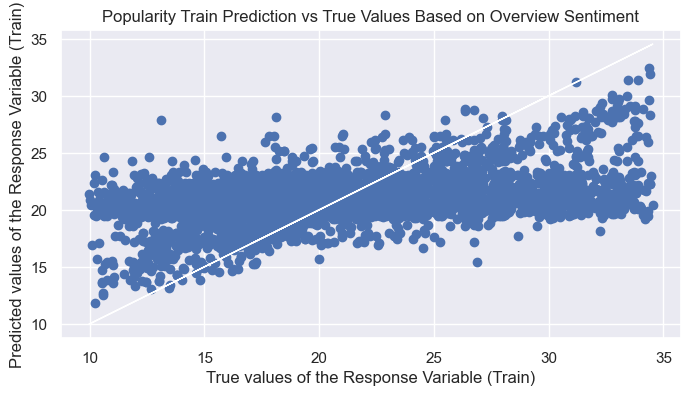

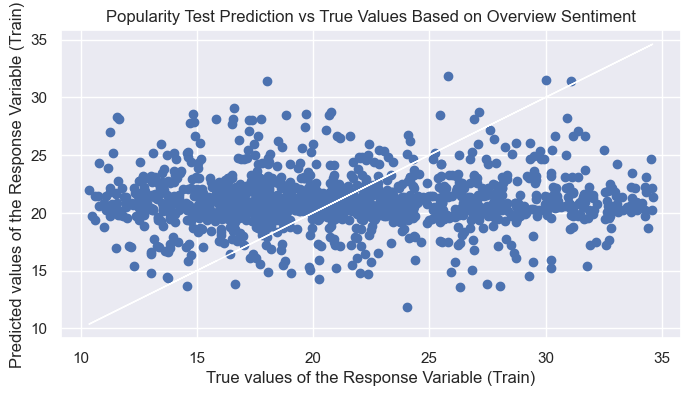

title_length vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.016476298004165058
Mean Squared Error (MSE) 	: 33.10995531636737

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.029105823503446926
Mean Squared Error (MSE) 	: 33.550693146852986



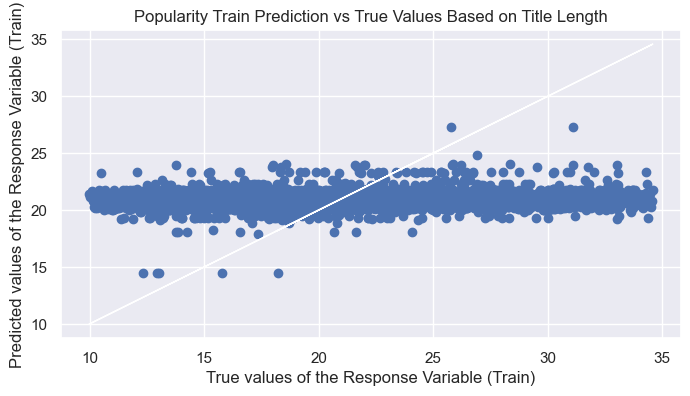

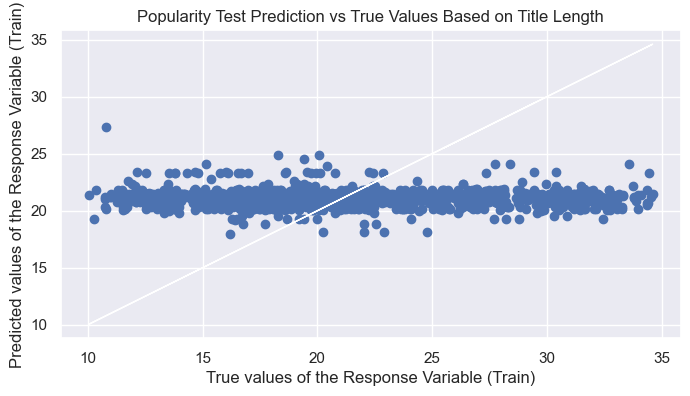

num_words_in_title vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0034584979872972488
Mean Squared Error (MSE) 	: 33.778537456718695

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.003508682826571796
Mean Squared Error (MSE) 	: 32.04777328655384



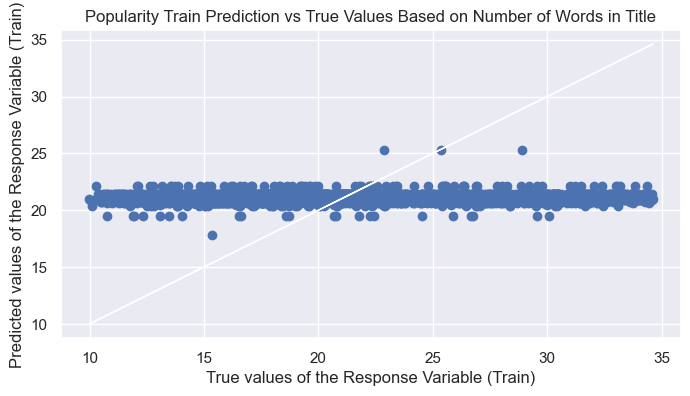

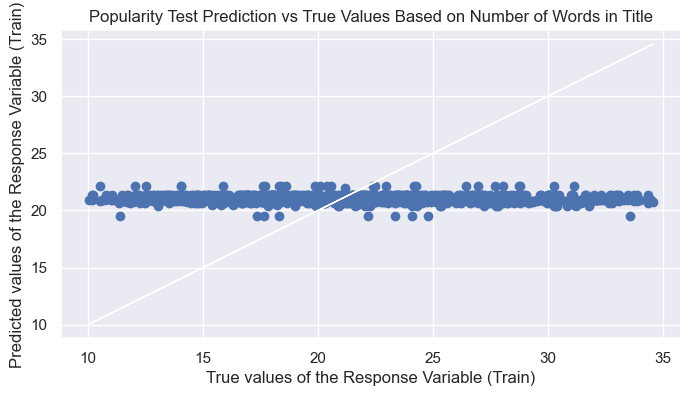

average_title_word_length vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03081894040345945
Mean Squared Error (MSE) 	: 31.92641845179811

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0333808764297423
Mean Squared Error (MSE) 	: 35.88184532919996



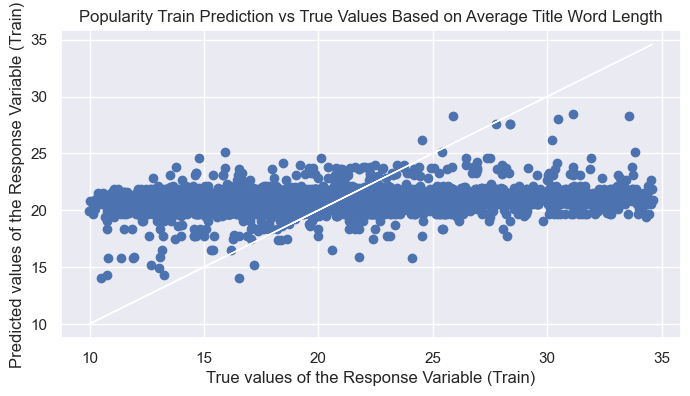

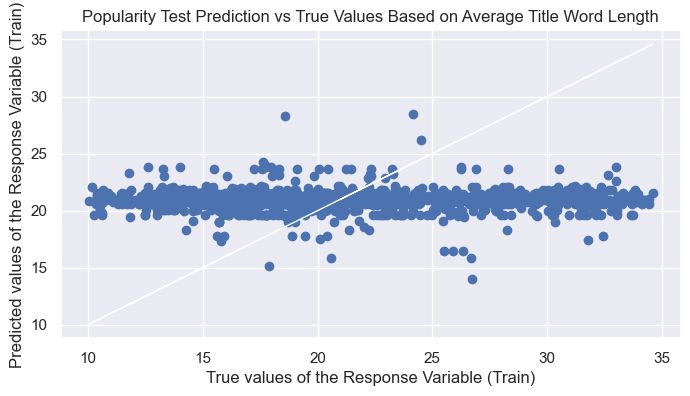

made_up_word_count vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0006533006711232359
Mean Squared Error (MSE) 	: 32.53668303938834

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.001328597694749467
Mean Squared Error (MSE) 	: 35.99601421109801



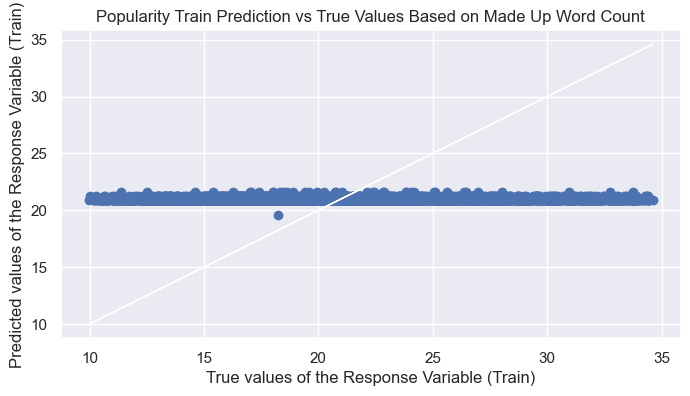

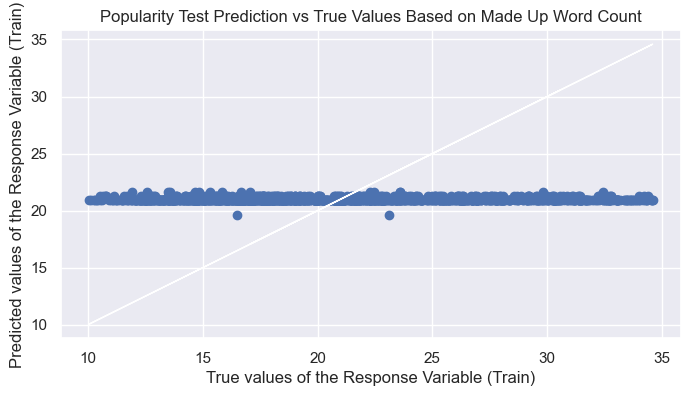

In [171]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "title_sentiment", "popularity", 200, 0)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Title Sentiment")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Title Sentiment")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "overview_sentiment", "popularity", 200, 0)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Overview Sentiment")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Overview Sentiment")

title_length_random_forest = generateRandomForestRegressor(data, "title_length", "popularity", 200, 0)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Title Length")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Title Length")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "num_words_in_title", "popularity", 200, 0)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Number of Words in Title")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Number of Words in Title")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "average_title_word_length", "popularity", 200, 0)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Average Title Word Length")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Average Title Word Length")

made_up_word_count_random_forest = generateRandomForestRegressor(data, "made_up_word_count", "popularity", 200, 0)
generatePredictVsTruePlot(made_up_word_count_random_forest['response_train'], made_up_word_count_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Made Up Word Count")
generatePredictVsTruePlot(made_up_word_count_random_forest['response_test'], made_up_word_count_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Made Up Word Count")

## Multi-Variate Predictor vs. Popularity

['title_sentiment', 'overview_sentiment', 'title_length', 'num_words_in_title', 'average_title_word_length', 'made_up_word_count'] vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7910791857127608
Mean Squared Error (MSE) 	: 6.954032660881584

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.20683484862700086
Mean Squared Error (MSE) 	: 40.676423166685844



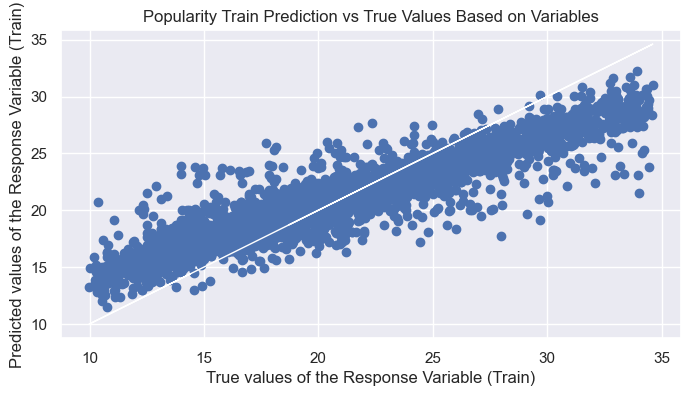

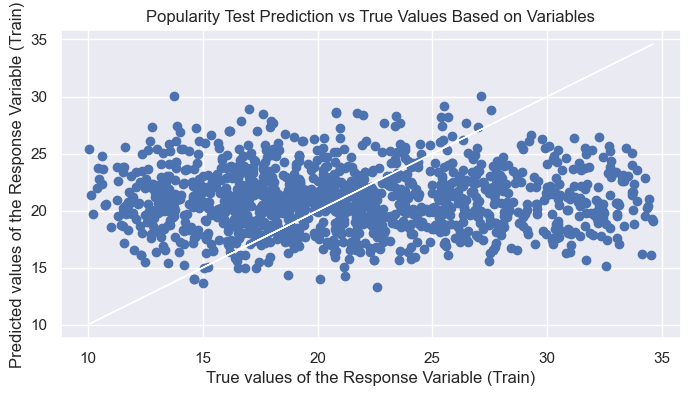

In [168]:
multi_variate_random_forest = generateRandomForestRegressor(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], "popularity", 200, 0)
generatePredictVsTruePlot(multi_variate_random_forest['response_train'], multi_variate_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Variables")
generatePredictVsTruePlot(multi_variate_random_forest['response_test'], multi_variate_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Variables")

# Classification Tree

## Vote Average

vote_average vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 34.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8775457592162929
Test Classification Accuracy 	: 0.888631090487239
Train Confusion Matrix
True Positive Rate: 0.28728414442700156
False Positive Rate: 0.006477483035163479
True Negative Rate: 0.9935225169648365
False Negative Rate: 0.7127158555729984
Test Confusion Matrix
True Positive Rate: 0.3598130841121495
False Positive Rate: 0.006487488415199258
True Negative Rate: 0.9935125115848007
False Negative Rate: 0.6401869158878505


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


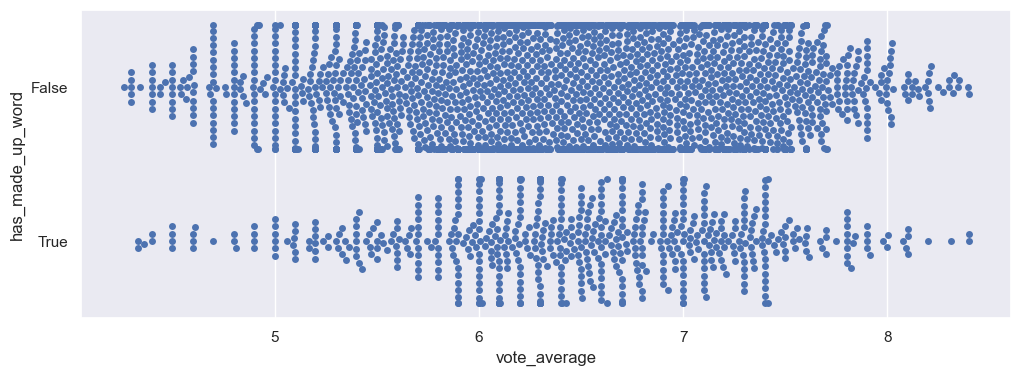

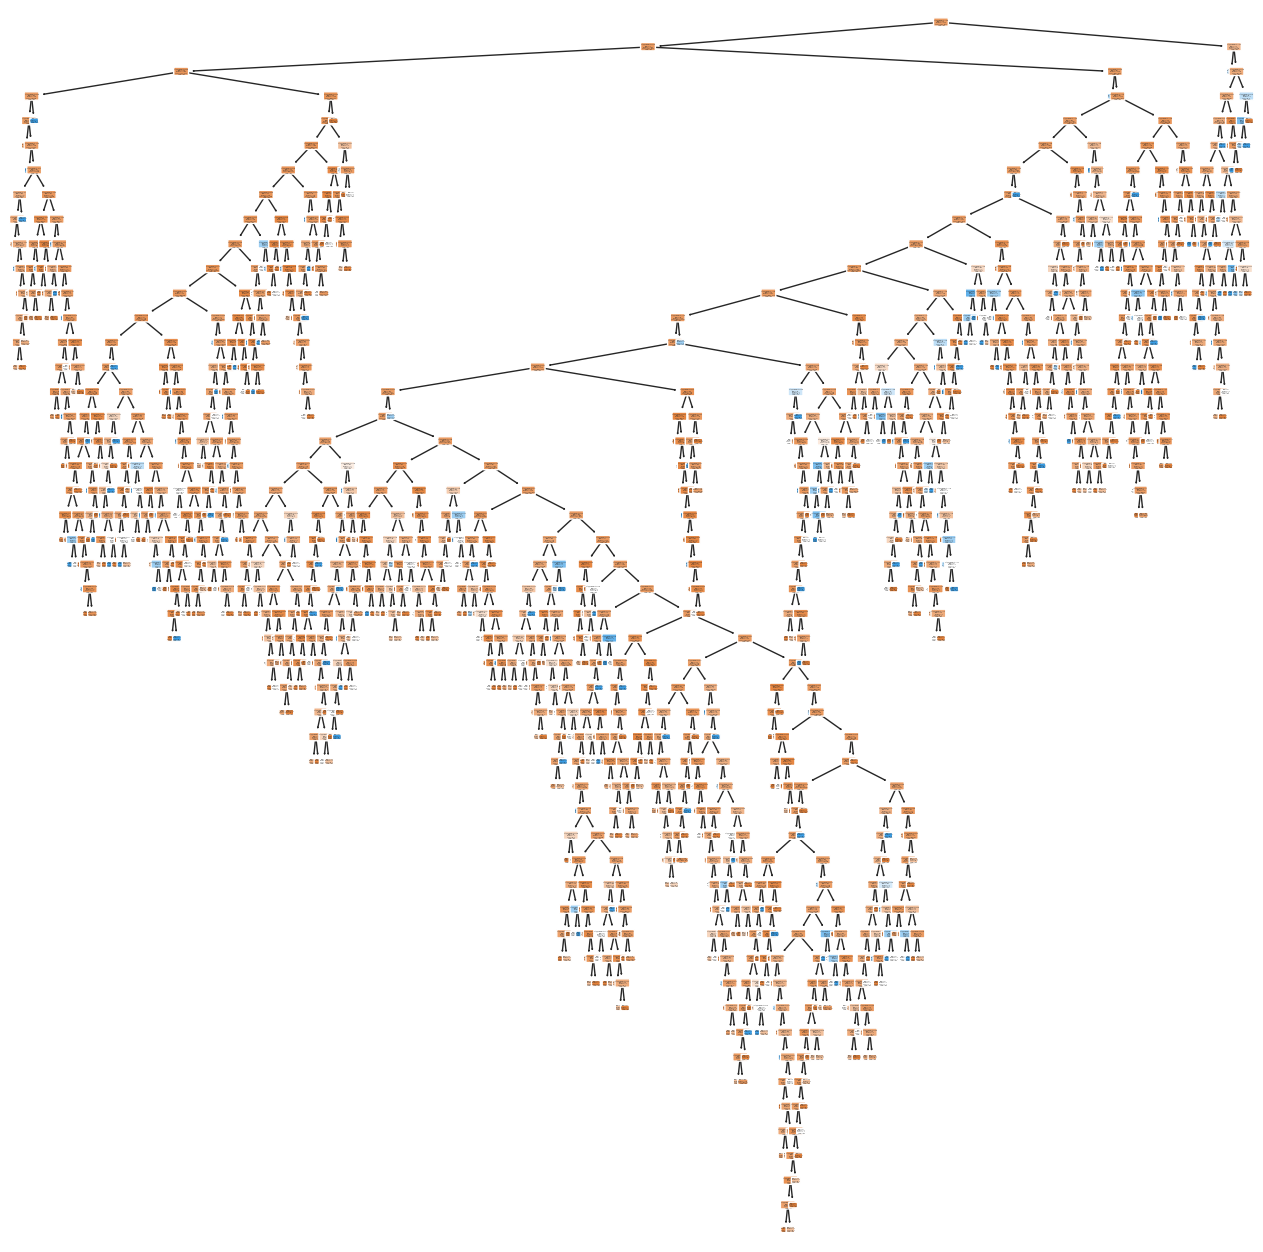

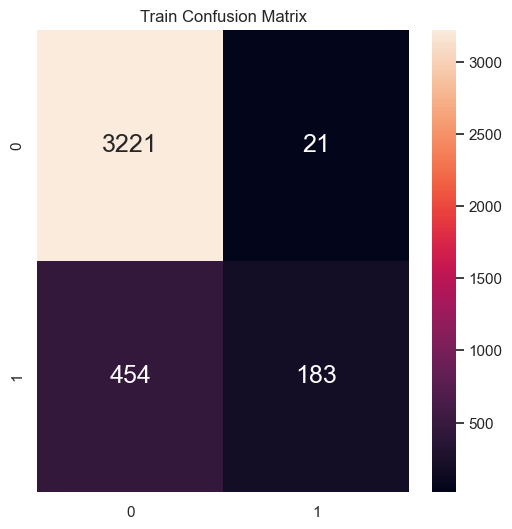

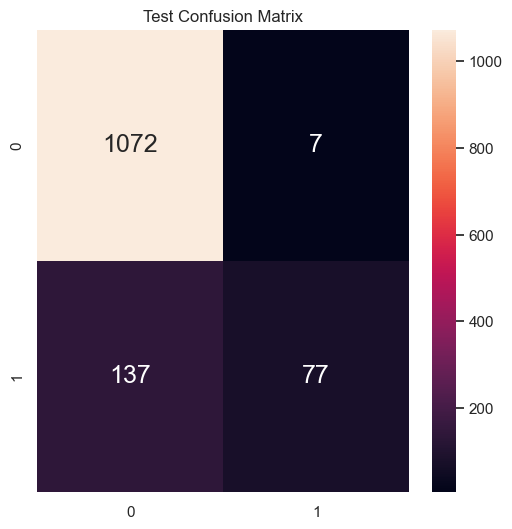

In [21]:
has_made_up_word_class_tree = generateClassificationTree(data,"vote_average",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_class_tree['response_train'], has_made_up_word_class_tree['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_class_tree['response_test'], has_made_up_word_class_tree['response_test_pred'], "Test Confusion Matrix")

## Popularity

popularity vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.97164217581851
Test Classification Accuracy 	: 0.9675174013921114
Train Confusion Matrix
True Positive Rate: 0.8328125
False Positive Rate: 0.0009262117937635072
True Negative Rate: 0.9990737882062365
False Negative Rate: 0.1671875
Test Confusion Matrix
True Positive Rate: 0.8009478672985783
False Positive Rate: 0.0
True Negative Rate: 1.0
False Negative Rate: 0.1990521327014218


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


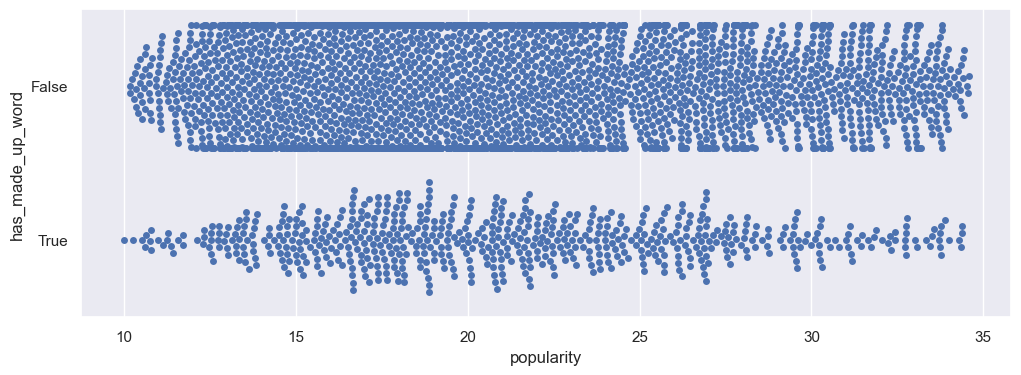

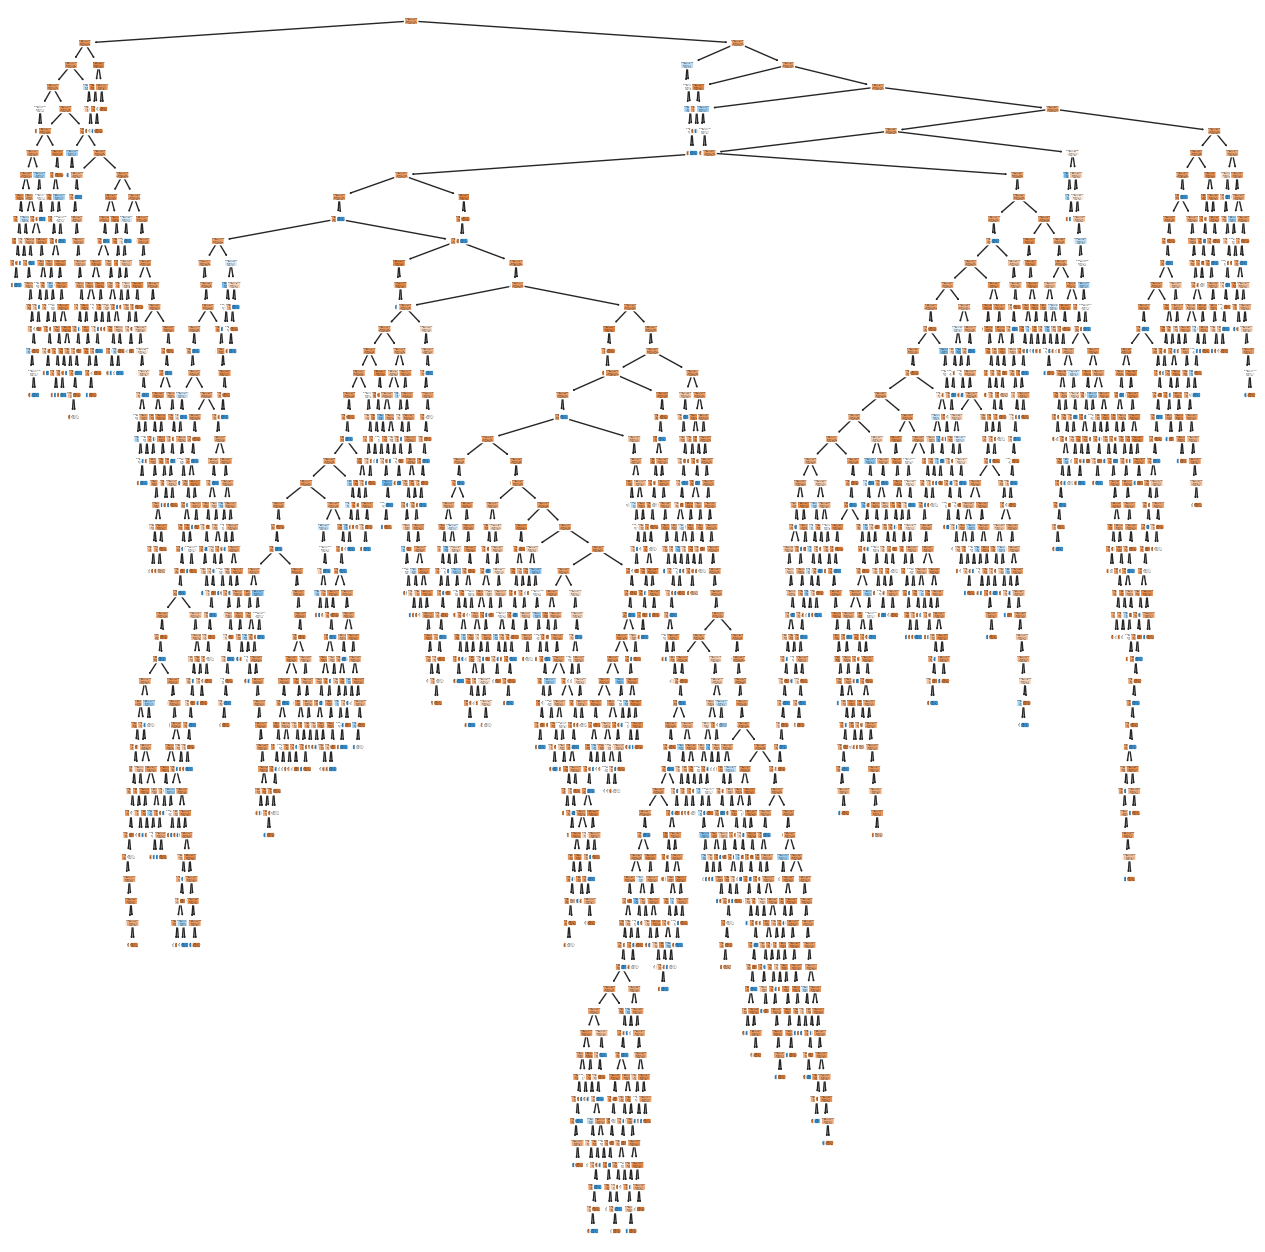

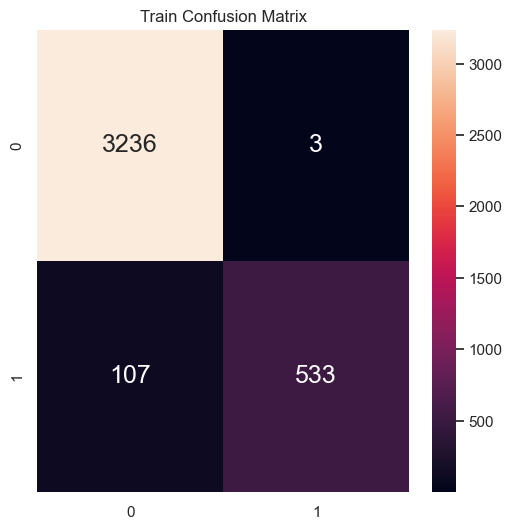

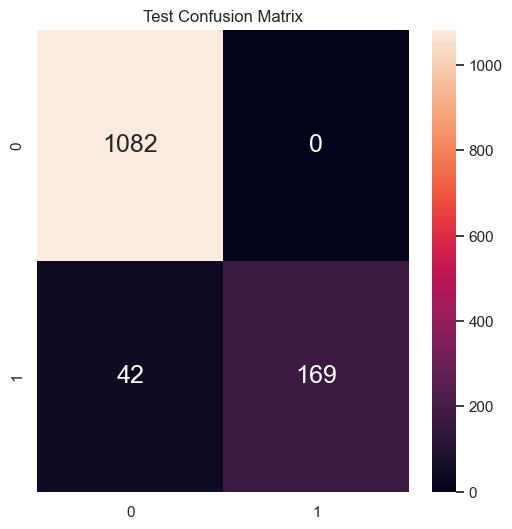

In [174]:
has_made_up_word_class_tree = generateClassificationTree(data,"popularity",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_class_tree['response_train'], has_made_up_word_class_tree['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_class_tree['response_test'], has_made_up_word_class_tree['response_test_pred'], "Test Confusion Matrix")

# Random Forest Classifier

## Vote Average

vote_average vs. has_made_up_word with depth 80
Train Classification Accuracy 	: 0.8852797112657902
Test Classification Accuracy 	: 0.7904098994586234
Train Confusion Matrix
True Positive Rate: 0.3715170278637771
False Positive Rate: 0.012063099288586452
True Negative Rate: 0.9879369007114136
False Negative Rate: 0.628482972136223
Test Confusion Matrix
True Positive Rate: 0.14634146341463414
False Positive Rate: 0.08823529411764706
True Negative Rate: 0.9117647058823529
False Negative Rate: 0.8536585365853658


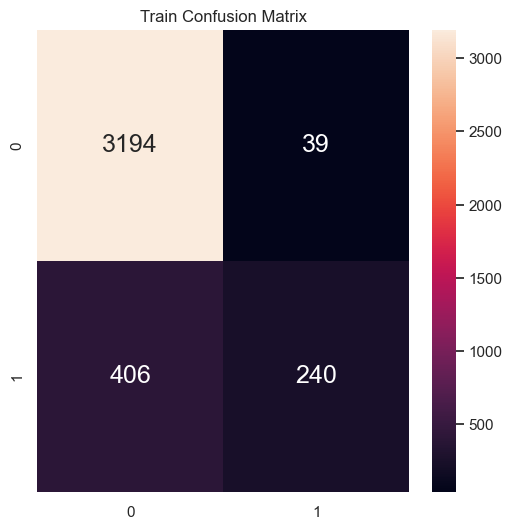

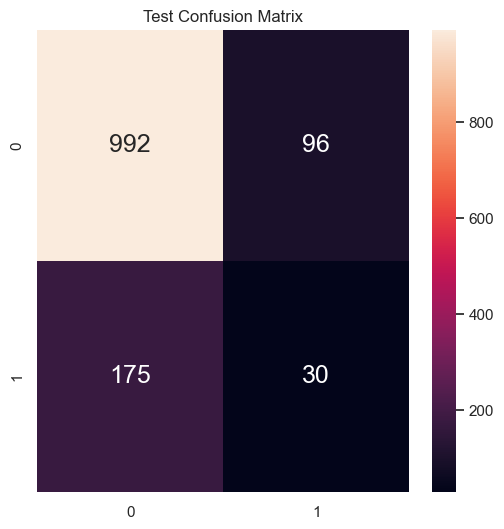

In [180]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "vote_average", "has_made_up_word", 150, 80)
generateConfusionMatrix(has_made_up_word_random_forest['response_train'], has_made_up_word_random_forest['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest['response_test'], has_made_up_word_random_forest['response_test_pred'], "Test Confusion Matrix")

## Popularity

popularity vs. has_made_up_word with depth 80
Train Classification Accuracy 	: 0.9760247486465584
Test Classification Accuracy 	: 0.7416860015467904
Train Confusion Matrix
True Positive Rate: 0.884375
False Positive Rate: 0.005866008027168879
True Negative Rate: 0.9941339919728311
False Negative Rate: 0.115625
Test Confusion Matrix
True Positive Rate: 0.2037914691943128
False Positive Rate: 0.1534195933456562
True Negative Rate: 0.8465804066543438
False Negative Rate: 0.7962085308056872


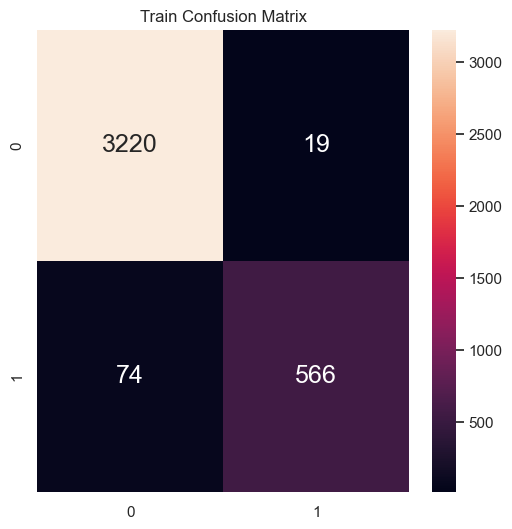

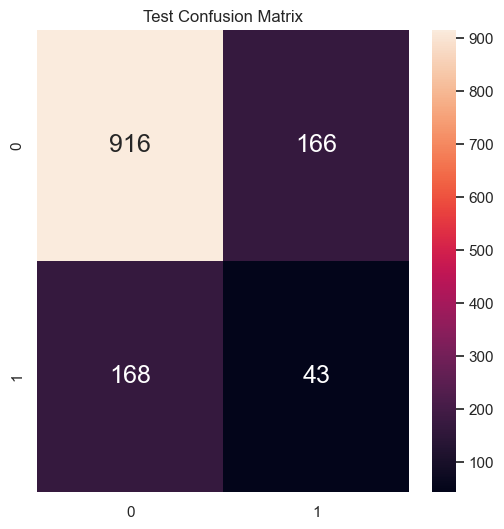

In [181]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "popularity", "has_made_up_word", 150, 80)
generateConfusionMatrix(has_made_up_word_random_forest['response_train'], has_made_up_word_random_forest['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest['response_test'], has_made_up_word_random_forest['response_test_pred'], "Test Confusion Matrix")